In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle
import cv2
%matplotlib inline

In [3]:
# load all the models
haar = cv2.CascadeClassifier('/Users/91830/FaceRecognition/data/model/haarcascade_frontalface_default.xml')
# pickle files
mean  = pickle.load(open('/Users/91830/FaceRecognition/data/model/mean_preprocess.pickle','rb'))
model_svm  = pickle.load(open('/Users/91830/FaceRecognition/data/model/model_svm.pickle','rb'))
model_pca  = pickle.load(open('/Users/91830/FaceRecognition/pca_50.pickle','rb'))

print('Model loaded sucessfully')

Model loaded sucessfully


In [4]:
gender_pre = ['Male','Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [12]:
# test data
test_data_path = '/Users/91830/FaceRecognition/data/male/male_000281.jpg'
color = 'bgr'
# step-1: read image
img = cv2.imread(test_data_path)
    
def pipeline_model(img,color='rgb'):    
    # step-2 :convert into grey scale
    if color == 'bgr':
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Step-3: crop the face(using haar cascade classififer)
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) #draw rectangle
        roi = gray[y:y+h,x:x+w] # crop image
        # Step-4 : normalization  (0-1)
        roi = roi / 255.0
        # Step -5 :resize image (100,100)
        if roi.shape[1] > 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else :
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
        #Step - 6 :Flatterning (1X10000)
        roi_reshape = roi_resize.reshape(1,10000) # 1,-1
        # Step-7: Subplots with mean
        roi_mean =  roi_reshape - mean
        # Step - 8: Get eigen image
        eigen_image = model_pca.transform(roi_mean)
        # Step - 9 : Pass to ml model (svm)
        results = model_svm.predict_proba(eigen_image)[0]
        # Step -10:
        predict = results.argmax() # 0 or 1
        score = results[predict]
        # Step 11 :
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    return img    
    
    

In [14]:
from PIL import Image

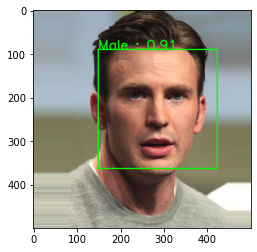

In [17]:
test_data_path ='/Users/91830/FaceRecognition/data/male/male_000281.jpg'
color = 'bgr'
#step-1: read image
img = Image.open(test_data_path) # rgb
# step2: convert into array
img = np.array(img)
# step3: pass to pipeline model
img = pipeline_model(img)
plt.imshow(img)